In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the data
xls = pd.ExcelFile('Prosthetic Systems-Data Set.xlsx')
df1 = pd.read_excel(xls, 'Dataset')

## EDA 

In [3]:
# Checking the features available in the dataset

print(df1.columns.values)

['ID' 'Age (in years)' 'Experience (in years)' 'Income (in K/month)'
 'ZIP Code' 'Family members' 'CCAvg' 'Education' 'Mortgage'
 'Personal Loan' 'Securities Account' 'CD Account' 'Online' 'CreditCard']


In [4]:
df1.head()

,ID,Age (in years),Experience (in years),Income (in K/month),ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                       5000 non-null int64
Age (in years)           5000 non-null int64
Experience (in years)    5000 non-null int64
Income (in K/month)      5000 non-null int64
ZIP Code                 5000 non-null int64
Family members           4982 non-null float64
CCAvg                    5000 non-null float64
Education                5000 non-null int64
Mortgage                 5000 non-null int64
Personal Loan            5000 non-null int64
Securities Account       5000 non-null int64
CD Account               5000 non-null int64
Online                   5000 non-null int64
CreditCard               5000 non-null int64
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


In [6]:
#Renaming column names
df1.rename(columns={'Age (in years)': 'Age', 'Experience (in years)': 'Experience', 'Income (in K/month)':'Income'}, inplace=True)

In [7]:
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4.0,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3.0,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1.0,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1.0,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4.0,1.0,2,0,0,0,0,0,1


## Univariate Analysis

In [8]:
df1['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [9]:
df1['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [10]:
df1['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [11]:
df1['Family members'].value_counts()

1.0    1464
2.0    1292
4.0    1217
3.0    1009
Name: Family members, dtype: int64

In [12]:
df1['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [13]:
df1['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [14]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [15]:
# importing required libraries
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

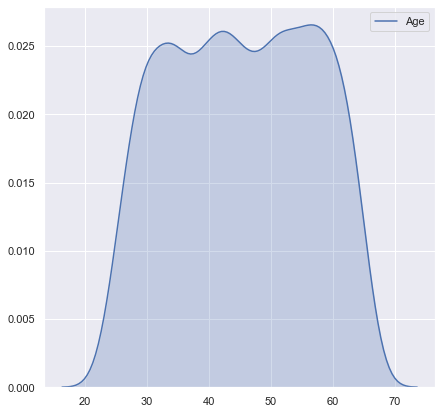

In [16]:
# distribution of Age
plt.figure(figsize=(7,7))
sns.kdeplot(df1['Age'], shade=True);

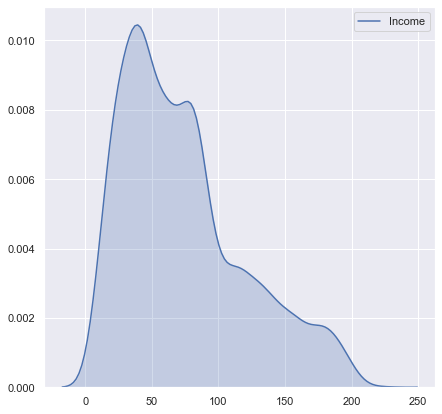

In [17]:
# distribution of Income
plt.figure(figsize=(7,7))
sns.kdeplot(df1['Income'], shade=True);

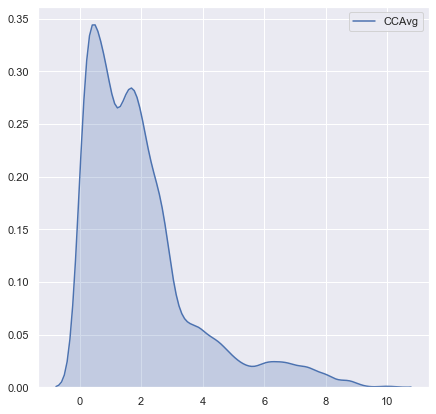

In [18]:
# distribution of Age
plt.figure(figsize=(7,7))
sns.kdeplot(df1['CCAvg'], shade=True);

## Bivariate Analysis

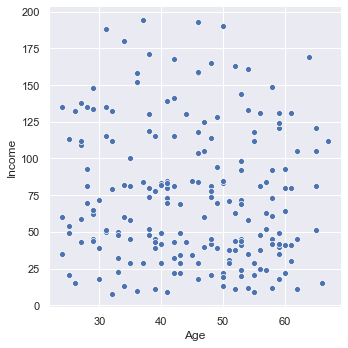

In [19]:
# scatter plot
sns.relplot(x="Age", y="Income", data=df1[:200], kind="scatter");

#### There is no linearity between age and income. The distribution seems even

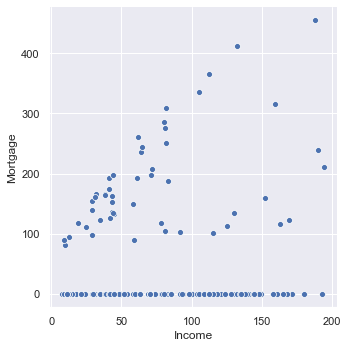

In [20]:
# scatter plot
sns.relplot(x="Income", y="Mortgage", data=df1[:200], kind="scatter");

#### WE CAN SEE THERE IS A DIRECTLY PROPORTIONAL RELATIONSHIP AS INCOME INCREASES SO DOES MORTGAGE

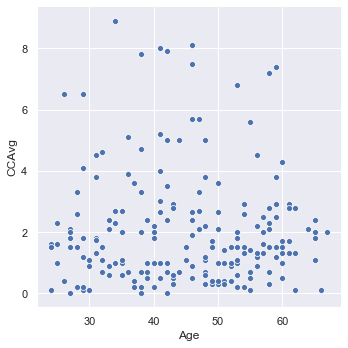

In [21]:
# scatter plot
sns.relplot(x="Age", y="CCAvg", data=df1[:200], kind="scatter");

#### CREDIT CARD SPENDING INCREASES GRADUALLY WITH AGE

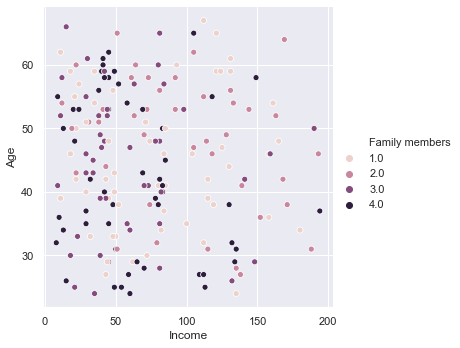

In [22]:
# hue semantic
sns.relplot(x="Income", y="Age", hue="Family members",data=df1[:200]);

## MISSING VALUE TREATMENT

In [23]:
# check for null values in dataset
df1.columns[df1.isna().any()].tolist()

['Family members']

In [24]:
df1['Family members'].fillna(np.mean(df1['Family members']),inplace=True)

In [25]:
# recheck for null values in dataset
df1.columns[df1.isna().any()].tolist()

[]

## OUTLIER TREATMENT

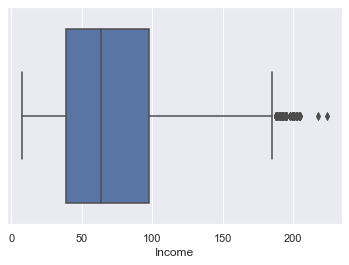

In [26]:
sns.boxplot(df1['Income'], orient='Income');

In [27]:
df1.loc[df1['Income']>200,'Income']=np.mean(df1['Income'])

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null float64
ZIP Code              5000 non-null int64
Family members        5000 non-null float64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 547.0 KB


## NORMALIZING NUMERIC FEATURES

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Age', 'Experience', 'Income', 'Mortgage', 'ZIP Code']

features_log_minmax_transform = pd.DataFrame(data = df1)
features_log_minmax_transform[numerical] = scaler.fit_transform(df1[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,ID,Age,Experience,Income,ZIP Code,Family members,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,0.045455,0.086957,0.213542,0.936527,4.0,1.6,1,0.0,0,1,0,0,0
1,2,0.500000,0.478261,0.135417,0.924872,3.0,1.5,1,0.0,0,1,0,0,0
2,3,0.363636,0.391304,0.015625,0.977892,1.0,1.0,1,0.0,0,0,0,0,0
3,4,0.272727,0.260870,0.479167,0.970931,1.0,2.7,2,0.0,0,0,0,0,0
4,5,0.272727,0.239130,0.192708,0.939080,4.0,1.0,2,0.0,0,0,0,0,1


## MODELLING

#### FOR THE CURRENT USE CASE AFTER GOING THROUGH EDA I HAVE DECIDED TO USE PRESONAL LOAN AS TARGET VARIABLE. AS WE NEED TO IDENTIFY POTENTIAL CUSTOMER WITH HIGHER PROBIBILITY OF PURCHASING LOANS.

#### SHUFFLE AND SPLIT DATA

In [30]:
# Split the data into features and target label
PersonalLoan = features_log_minmax_transform['Personal Loan']
features = features_log_minmax_transform.drop('Personal Loan', axis = 1)

In [31]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    PersonalLoan, 
                                                    test_size = 0.4, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {:,} samples.".format(X_train.shape[0]))
print("Testing set has {:,} samples.".format(X_test.shape[0]))

Training set has 3,000 samples.
Testing set has 2,000 samples.


### DECISION TREE

In [32]:
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

In [33]:
model = dtc(criterion = 'entropy', max_depth = 3)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 98%


[Text(590.1923076923077, 951.3000000000001, 'X[3] <= 0.471\nentropy = 0.456\nsamples = 3000\nvalue = [2712, 288]'),
 Text(214.6153846153846, 679.5, 'X[6] <= 2.95\nentropy = 0.067\nsamples = 2265\nvalue = [2247, 18]'),
 Text(107.3076923076923, 407.70000000000005, 'entropy = 0.0\nsamples = 2137\nvalue = [2137, 0]'),
 Text(321.9230769230769, 407.70000000000005, 'X[10] <= 0.5\nentropy = 0.586\nsamples = 128\nvalue = [110, 18]'),
 Text(214.6153846153846, 135.89999999999998, 'entropy = 0.469\nsamples = 120\nvalue = [108, 12]'),
 Text(429.2307692307692, 135.89999999999998, 'entropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(965.7692307692307, 679.5, 'X[7] <= 1.5\nentropy = 0.949\nsamples = 735\nvalue = [465, 270]'),
 Text(751.1538461538462, 407.70000000000005, 'X[5] <= 2.699\nentropy = 0.499\nsamples = 437\nvalue = [389, 48]'),
 Text(643.8461538461538, 135.89999999999998, 'entropy = 0.084\nsamples = 383\nvalue = [379, 4]'),
 Text(858.4615384615385, 135.89999999999998, 'entropy = 0.691\nsam

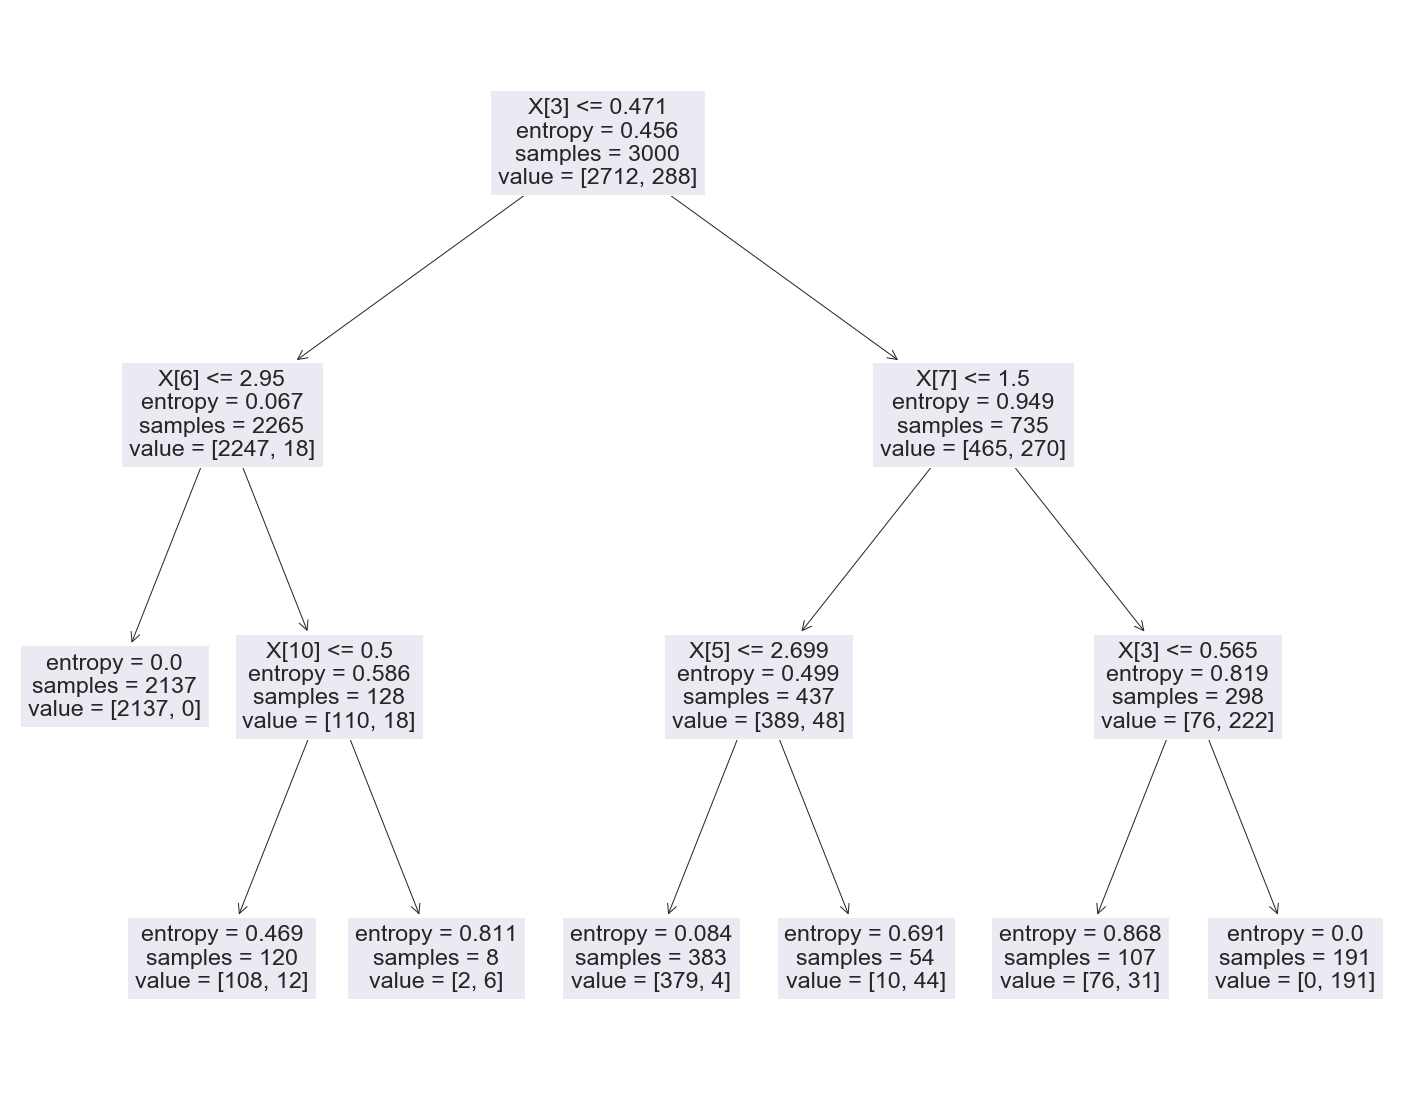

In [34]:
from sklearn import tree
tree.plot_tree(model)

In [35]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

clf1=RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
preds = clf1.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, preds)), attrs = ['bold']))

Accuracy of the model is 98%


In [38]:
pd.DataFrame(clf1.feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)

,0
Income,0.309211
Education,0.200090
CCAvg,0.157203
Family members,0.102772
CD Account,0.041972
ZIP Code,0.036008
Mortgage,0.034382
Experience,0.034325
ID,0.034188
Age,0.031074


In [40]:
#CONFUSION MATRIX FOR RANDOM FOREST
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, preds)

array([[1805,    3],
       [  38,  154]], dtype=int64)

In [42]:
#CONFUSION MATRIX FOR DECISION FOREST
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_model)

array([[1796,   12],
       [  34,  158]], dtype=int64)

## CONCLUSION

ACCURACY FOR BOTH THE MODELS IS THE SAME. HOWEVER TRUE POSITIVE ARE SLIGHTLY MORE WITH RANDOM FOREST.
THUS I WOULD LIKE TO GO FORWARD WITH RANDOM FOREST AS MY FINAL MODEL.

ADDITIONALY FOR THE COMPANY TO FIND OUT CUSTOMERS WHO ARE LIKELY TO TAKE LOAN 
THEY SHOULD TARGET CUSTOMERS WHO HAVE HIGHER INCOME, HIGHER EDUCATION AND HIGHER CREDITCARD UTILIZATION.